## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

print('library imported')

library imported


### 2. Load the dataset and display a sample of five rows of the data frame.

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [5]:
# checking shape of data
df.shape

(319795, 18)

- The above output shows that we have 319795 rows and 18 columns.

In [6]:
# general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 319795 entries, 0 to 319794

Data columns (total 18 columns):

 #   Column            Non-Null Count   Dtype  

---  ------            --------------   -----  

 0   HeartDisease      319795 non-null  object 

 1   BMI               319795 non-null  float64

 2   Smoking           319795 non-null  object 

 3   AlcoholDrinking   319795 non-null  object 

 4   Stroke            319795 non-null  object 

 5   PhysicalHealth    319795 non-null  float64

 6   MentalHealth      319795 non-null  float64

 7   DiffWalking       319795 non-null  object 

 8   Sex               319795 non-null  object 

 9   AgeCategory       319795 non-null  object 

 10  Race              319795 non-null  object 

 11  Diabetic          319795 non-null  object 

 12  PhysicalActivity  319795 non-null  object 

 13  GenHealth         319795 non-null  object 

 14  SleepTime         319795 non-null  float64

 15  Asthma            319795 non-null  object 

 16 

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
# statistical summary of dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
# statistical summary of the categorical data
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


- The range of BMI is between 12.02 (min) to 94.85 (max).
- Amongst people, kidney disease can be seen as one of the most common disorder.
- There are 13 level of age categories.
- The number of smokers is less than the number of people who consume alcohol.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [10]:
# % of missing values in each column of the data frame
df.isnull().sum()/len(df) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [11]:
df.dropna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


- Note: No missing values found in the above dataset.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [12]:
# checking for any duplicate rows
len(df[df.duplicated()])

18078

- 18078 duplicate rows have been found.

In [16]:
# dropping duplicate rows
df.drop_duplicates(keep='first',inplace=True)
print('duplicate rows dropped.\nNow duplicate row count is')
len(df[df.duplicated()])

#shape
print('Now After dropping duplicate values, shape of data frame')
df.shape

duplicate rows dropped.

Now duplicate row count is

Now After dropping duplicate values, shape of data frame


(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

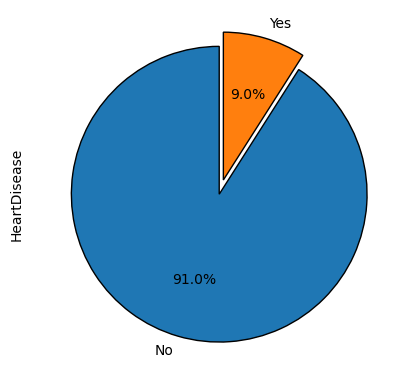

In [18]:
explode = (0, 0.1)
df['HeartDisease'].value_counts().plot(  kind='pie', explode = explode, 
                                            autopct='%1.1f%%', startangle = 90,
                                            wedgeprops = {"edgecolor":"black",'linewidth': 1,'antialiased': True}
                                        )
plt.show()

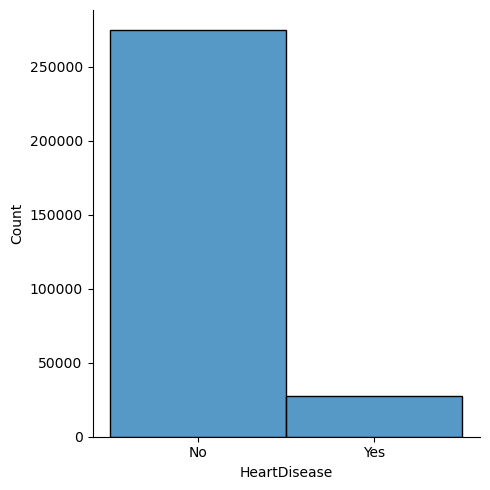

In [19]:
sns.displot(data=df,x='HeartDisease')

- The target class distribution is highly imbalanced.

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [20]:
# categorical features
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

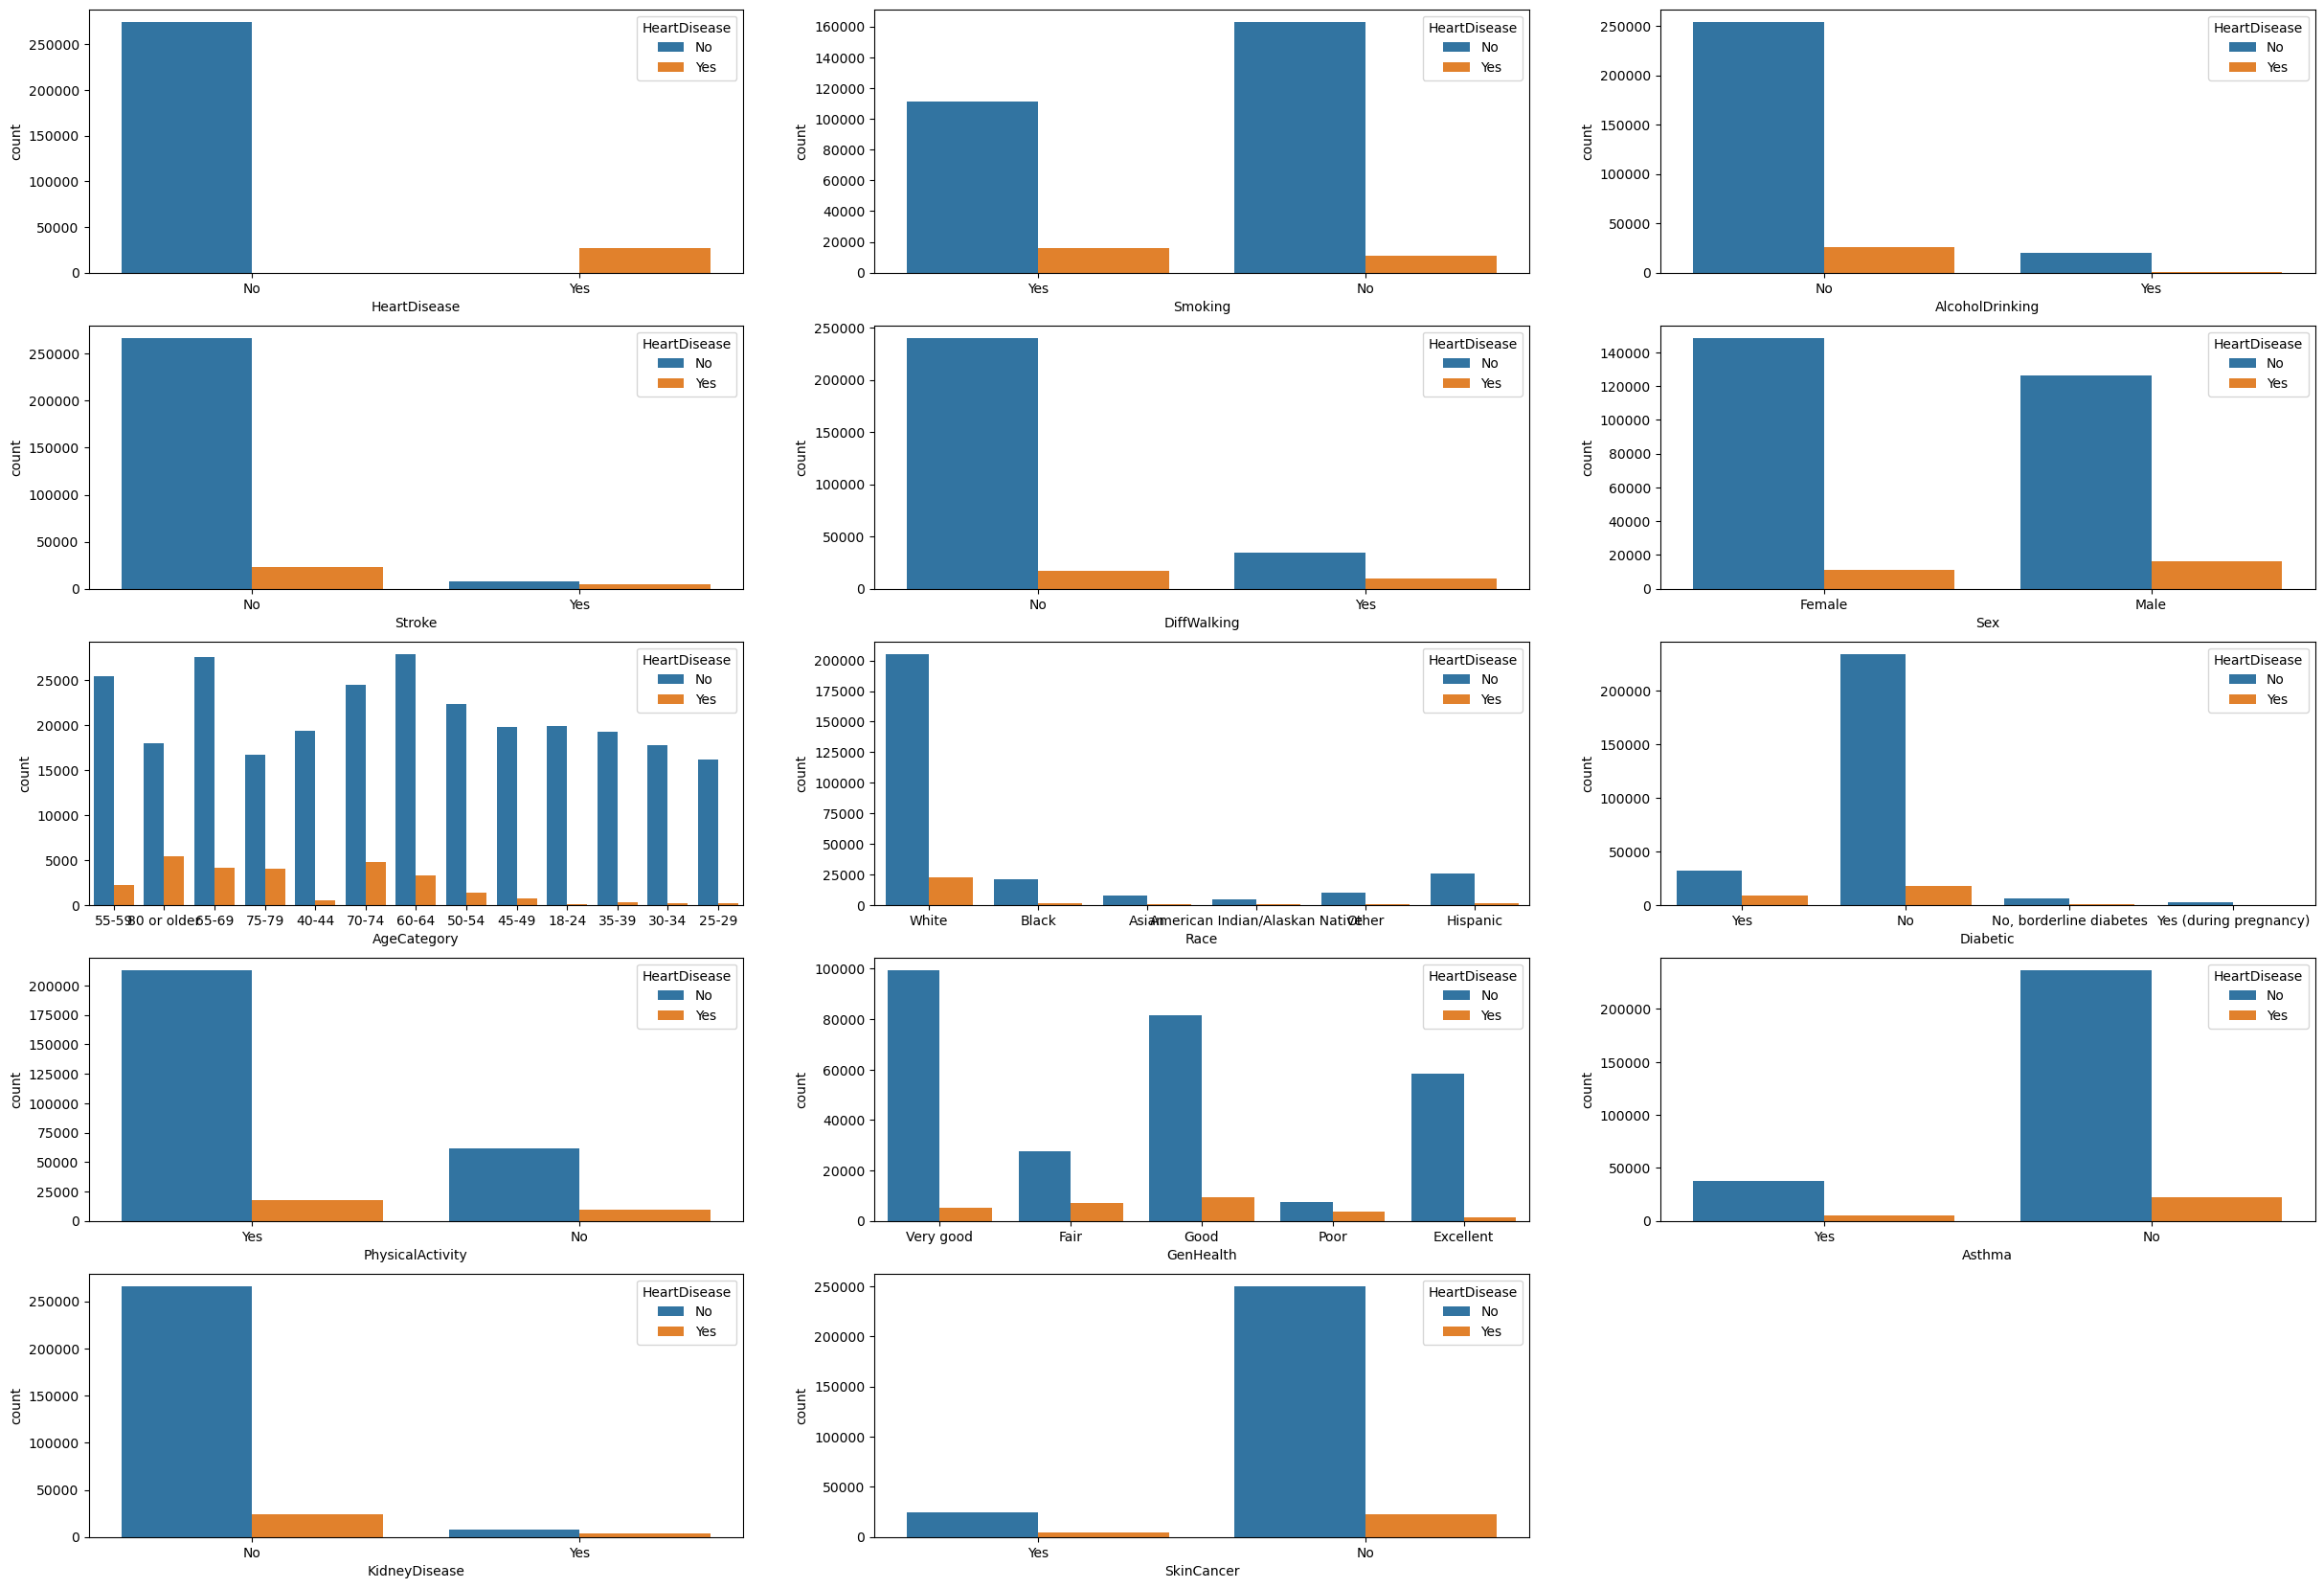

In [21]:
plt.figure(figsize=(30,25))

for i,feature in enumerate(categorical_features):
    plt.subplot(6,3,i+1)
    sns.countplot(x=feature,hue='HeartDisease',data=df)

- People who smoke are more likely to develop heart disease than people who don't smoke.
- If you have difficulty walking or climbing stairs, its possible that you have a heart condition.
- Men are more likely to develop heart disease than women.
- White people are more likely to develop heart disease than people of other races.
- People between the ages of 50 and 79 are more likely to develop heart disease.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [22]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [25]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [26]:
df['HeartDisease']=df['HeartDisease'].replace ({'No': 0 , 'Yes': 1})

df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [28]:
object_type_variables = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

df = pd.get_dummies(df,drop_first=True)

df.head(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [29]:
X = df.drop('HeartDisease', axis=1)
X.sample(5)
y = df['HeartDisease']
y.sample(5)

318727    0
223315    0
273795    0
52677     0
124891    1
Name: HeartDisease, dtype: int64

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(211201, 17) (90516, 17)

(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [31]:
ss = StandardScaler()

X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])

X_train.head(5)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
188627,-0.516354,-0.439337,-0.507179,1.251880,0.512361,-1.469684,-0.057969,0,0,0,0,1,0,1,0,0,1
301971,2.203127,-0.439337,0.724062,0.694199,0.512361,-0.146465,0.623187,0,0,0,1,0,0,1,0,0,0
203082,0.842614,-0.439337,-0.507179,-0.700004,-1.920700,-1.469684,-0.739125,0,0,0,0,0,0,0,1,0,0
156541,-0.861120,1.279882,-0.260931,0.973039,0.512361,-0.808075,0.623187,1,0,0,0,1,1,0,1,0,0
88990,-0.401947,-0.193735,-0.260931,-0.421163,0.512361,-0.146465,0.623187,1,0,0,0,0,0,1,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [38]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    # fits the model with the train data
    model.fit(X_train, y_train)   
    # makes predictions on the test set
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy  # return all the metrics

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [40]:
# model intialising
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [41]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

### Conclusion

In [42]:
result

,Accuracy
Logistic Regression,0.909861
Naive Bayes,0.840017
KNN,0.900780
Decision tree,0.853252
Random Forest,0.898637
Ada Boost,0.910833
Gradient Boost,0.911209
Stacking,0.906028


- We can see that Logistic Regression, KNN, Ada boost, Gradient Boost and Stacking are the best performing models with almost 91% accuracy.

----
## Happy Learning:)
----